In [0]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

####Q1

In [0]:
def memory_patterns(n,p):
  patterns = np.random.choice([-1,1], (n,p))
  connections = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1, n):
        connections[i,j] = np.dot(patterns[i,:], patterns[j,:])/n # loop of mu
        connections[j,i] = connections[i,j] # synapse matrix is symmetric 

  np.fill_diagonal(connections,0)
  return patterns, connections

####Q2

In [0]:
# connections: j matrix, S: the network init vector which in {-1,+1}^n
def a_synchronic(connections, s, print_updates=False):
  j=0
  while True:
    j+=1
    s_t = copy.deepcopy(s)
    for i in range(connections.shape[0]):
      if s[i]*np.sign(np.dot(connections[i,:], s)) < 0: # update according to the rule; sign(0)=1
        s[i] *= -1
    if print_updates:
      print(np.sum(s != s_t),"neurons updated on trail",j)
    if np.all(s == s_t):
      return s

####Q3

In [0]:
def stability(connections, s, z):
  n = connections.shape[0]
  noisier = np.random.choice([-1,1],n,p=[z,1-z])
  s_noisy = s*noisier # change sign of s[i] w.p of z
  s_convergance = a_synchronic(connections=connections,s=s_noisy)
  return (n - np.sum(s_convergance == s))/n

####Q4

In [0]:
def simmulation(n,p,z):
  # pandas apply function convert ints to floats so we have to convert it back
  n = n.astype(np.int)
  p = p.astype(np.int)
  patt, conn = memory_patterns(n,p)
  return stability(conn,patt[:,0],z) # initialize with the first memory pattern

alpha = np.repeat(np.arange(0.02,0.302,step=0.02),5)
n = np.repeat(1000,len(alpha))
z = 0.1
p = np.ceil(n*alpha).astype(np.int)
df_exp = pd.DataFrame({"N":n, "P":p, "alpha":alpha})

In [6]:
df_exp.head()

,N,P,alpha
0,1000,20,0.02
1,1000,20,0.02
2,1000,20,0.02
3,1000,20,0.02
4,1000,20,0.02


In [0]:
# cell running is approx 105 sec.
df_exp["false_memory"] = df_exp.apply(lambda row: simmulation(n=row["N"], p=row["P"], z=z), axis=1)

In [0]:
df_mean_results = df_exp.groupby(by="alpha").mean()

####Q5

A glimpse of the area of the critical alpha value in the data frame results

In [9]:
df_mean_results.loc[0.1:0.23]

,N,P,false_memory
alpha,,,
0.10,1000,100,0.0040
0.12,1000,121,0.0040
0.14,1000,140,0.0080
0.16,1000,160,0.0772
0.18,1000,180,0.2420
0.20,1000,200,0.3406
0.22,1000,220,0.3222


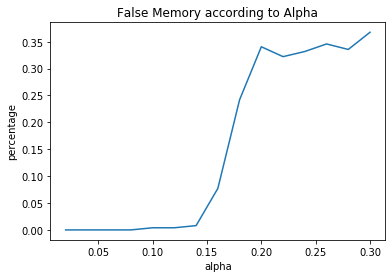

In [10]:
plt.plot(df_mean_results.index, df_mean_results["false_memory"])
plt.title("False Memory according to Alpha")
plt.xlabel("alpha")
plt.ylabel("percentage")
plt.show()

This graph explains the principle of network capacity showed in class. \
For alpha's below approx. 0.14 the network is stable and the error rate is low. From that value of alpha the error increasing exponentialy, and for larger alpha's the error rate converges to relatively high error rate. \
Namely, For large alpha's the network is more likely to produce false memories. This is a consequence of the principle showed in class, which says the more natural real memories the network has(dimension of P), it is more likely to converge to false memories.